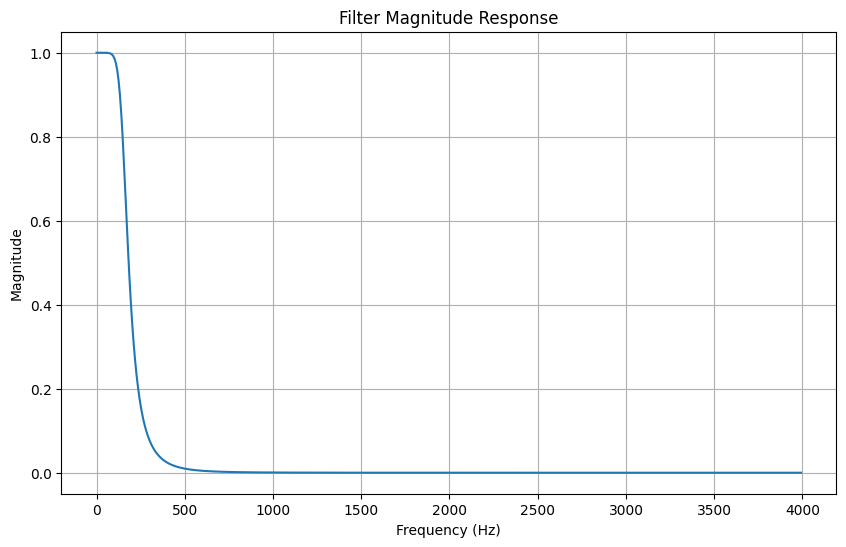

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


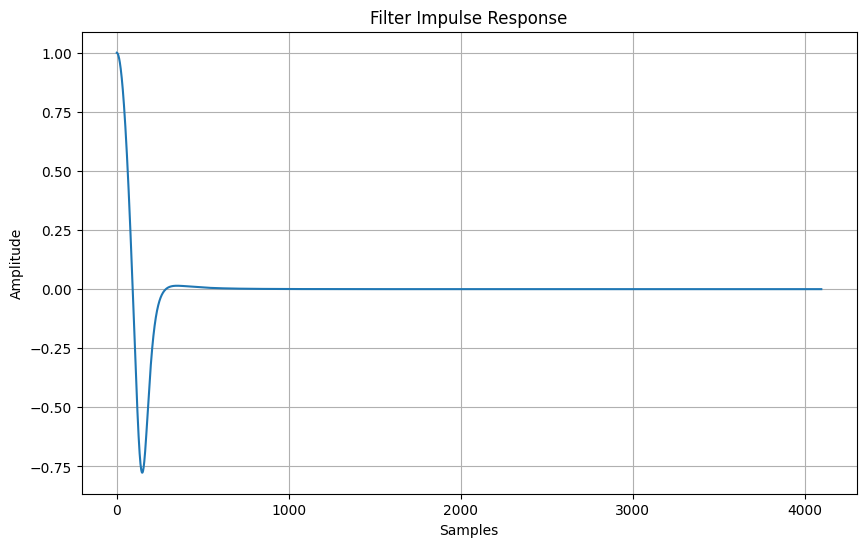

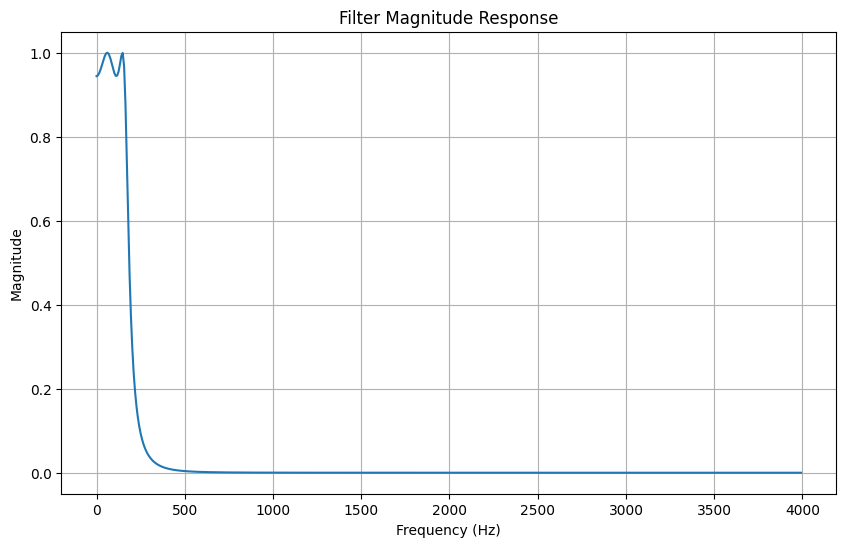

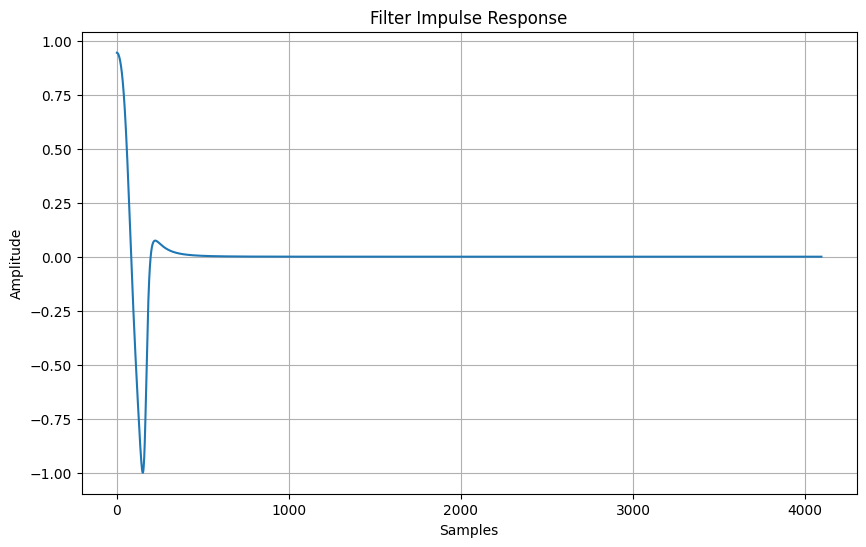

Filter coefficients saved at: filter_coefficients.txt


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, bilinear, freqz, cheby1

def design_butterworth_filter(filter_order, cutoff_frequency, sampling_frequency):
    # Design the analog Butterworth filter
    analog_b, analog_a = butter(filter_order, cutoff_frequency, analog=True, btype='low')

    # Perform the bilinear transformation
    digital_b, digital_a = bilinear(analog_b, analog_a, sampling_frequency)

    return digital_b, digital_a

def design_chebyshev_filter(filter_order, cutoff_frequency, sampling_frequency, ripple):
    # Design the analog Chebyshev filter
    analog_b, analog_a = cheby1(filter_order, ripple, cutoff_frequency, analog=True, btype='low')

    # Perform the bilinear transformation
    digital_b, digital_a = bilinear(analog_b, analog_a, sampling_frequency)

    return digital_b, digital_a

def plot_filter_response(digital_b, digital_a, sampling_frequency):
    # Compute the frequency response of the filter
    frequency, magnitude_response = freqz(digital_b, digital_a, fs=sampling_frequency)

    # Plot the magnitude response
    plt.figure(figsize=(10, 6))
    plt.plot(frequency, np.abs(magnitude_response))
    plt.title('Filter Magnitude Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

    # Compute the impulse response of the filter
    _, impulse_response = freqz(digital_b, digital_a, fs=sampling_frequency, worN=4096)

    # Plot the impulse response
    plt.figure(figsize=(10, 6))
    plt.plot(impulse_response)
    plt.title('Filter Impulse Response')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Specify the desired filter specifications
filter_order = 4  # Filter order
cutoff_frequency = 1000  # Cutoff frequency in Hz
sampling_frequency = 8000  # Sampling frequency in Hz
ripple = 0.5  # Ripple factor for Chebyshev filter

# Design the Butterworth filter
digital_b, digital_a = design_butterworth_filter(filter_order, cutoff_frequency, sampling_frequency)

# Plot the Butterworth filter's magnitude response and impulse response
plot_filter_response(digital_b, digital_a, sampling_frequency)

# Design the Chebyshev filter
digital_b, digital_a = design_chebyshev_filter(filter_order, cutoff_frequency, sampling_frequency, ripple)

# Plot the Chebyshev filter's magnitude response and impulse response
plot_filter_response(digital_b, digital_a, sampling_frequency)

# Save the filter coefficients (optional)
filter_path = 'filter_coefficients.txt'
np.savetxt(filter_path, np.vstack((digital_b, digital_a)), delimiter=',')
print(f"Filter coefficients saved at: {filter_path}")
